In [4]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Import

In [5]:
#import file and reading few lines
digits = pd.read_csv('digit_svm.csv')
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
digits.shape

(42000, 785)

In [7]:
#checking datatype
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


All the columns are of dtype - int64

In [8]:
digits.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [9]:
#checking for null values
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# Columns - label

In [10]:
# let us check unique entries of label column
np.unique(digits['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

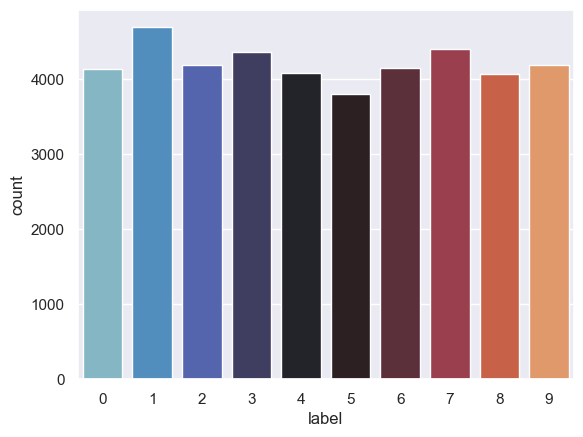

In [12]:
#visualising the column - label
sns.countplot(digits['label'],palette = 'icefire')

# Visualising Few Numbers

Text(0.5, 1.0, 'Digit 0')

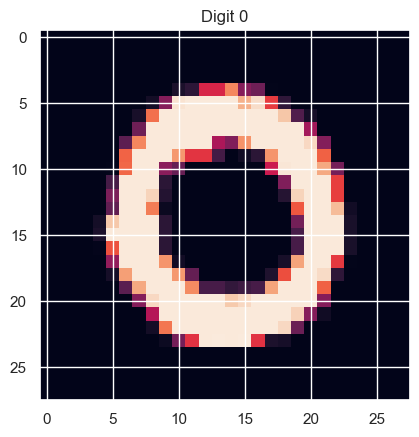

In [13]:
# Plotting few samples as well as converting into matrix
zero = digits.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 1')

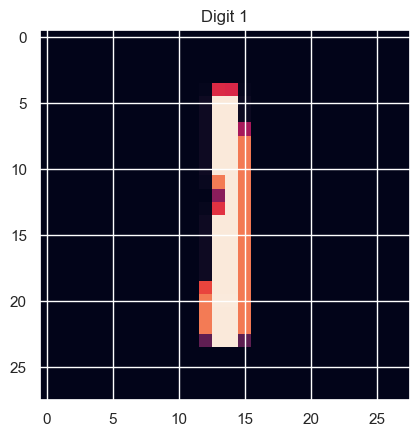

In [14]:
one = digits.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 2')

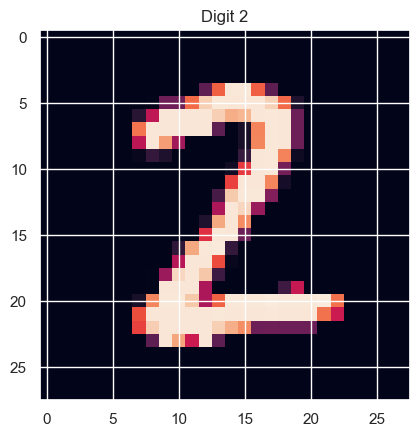

In [15]:
two = digits.iloc[22, 1:]
two = two.values.reshape(28,28)
plt.imshow(two)
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 9')

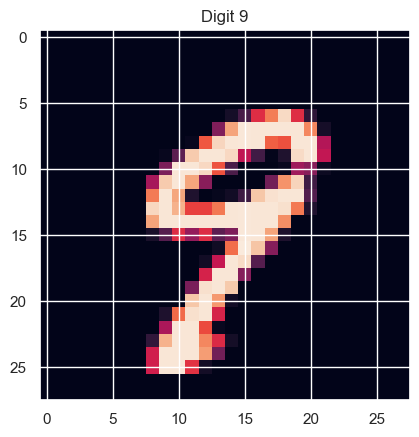

In [16]:
nine = digits.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

Text(0.5, 1.0, 'Digit 4')

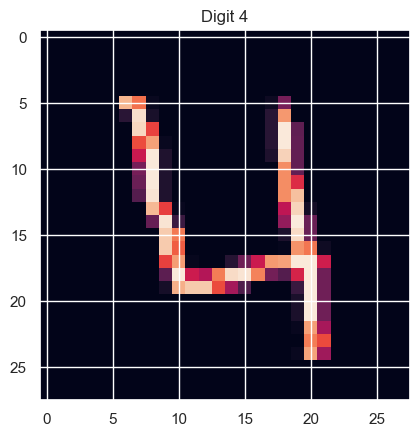

In [17]:
four = digits.iloc[3, 1:]
four = four.values.reshape(28,28)
plt.imshow(four)
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

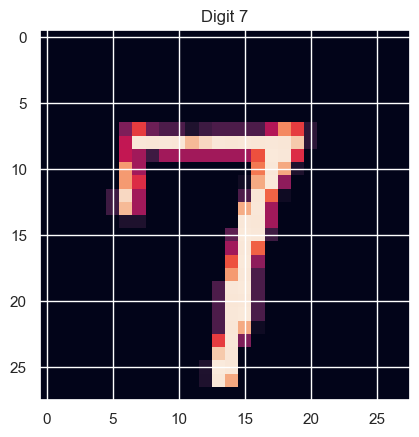

In [18]:
seven = digits.iloc[6, 1:]
seven = seven.values.reshape(28,28)
plt.imshow(seven)
plt.title("Digit 7")

# Heat Map

<AxesSubplot:>

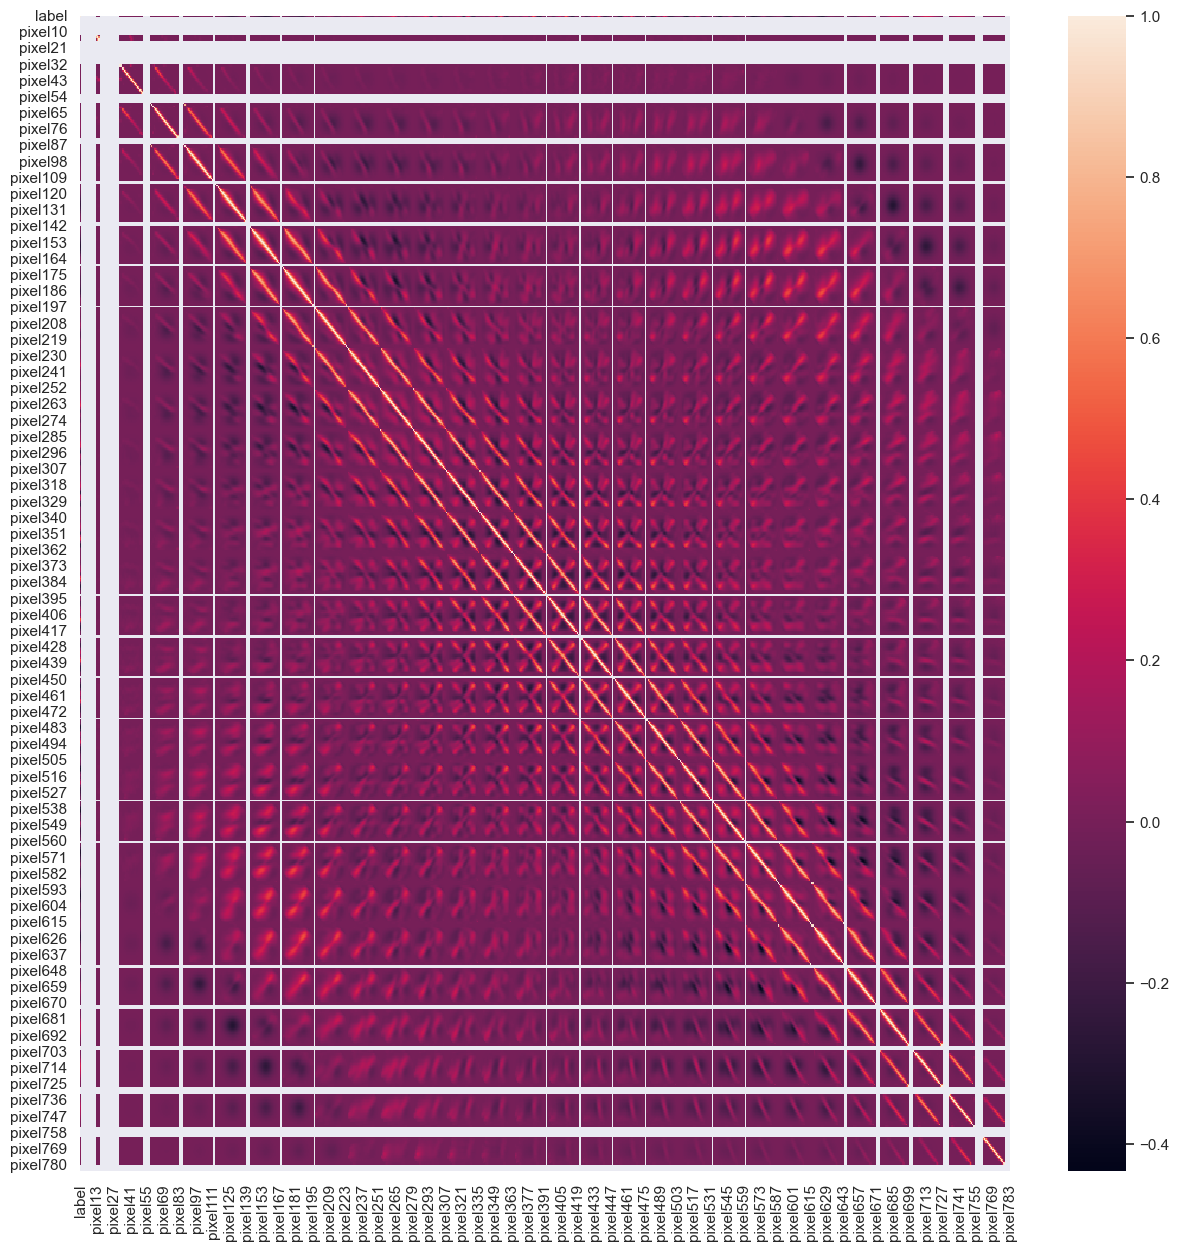

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data=digits.corr(),annot=False)

Almost all nerby pixel values are correlated which is expected as well

# Data Preparation

In [20]:
# average feature values
pd.set_option('display.max_rows', 999)
round(digits.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

we see that average varies between 140 to 0.It is better to scale them

In [21]:
# seperating the X and Y variable
X = digits.drop("label", axis = 1)
Y = digits['label']
print(digits.shape)

(42000, 785)


In [52]:
# scaling the features
X_scaled = scale(X)

from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.2,test_size = 0.8, random_state = 42)

In [53]:
print('X_digit shape:',X_train.shape)
print('Y_digit shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_digit shape: (8400, 784)
Y_digit shape: (8400,)
X_test shape: (33600, 784)
Y_test shape: (33600,)


# Model Building

# Linear Model

In [54]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

# predict
y_pred = model_linear.predict(X_test)

In [60]:
# confusion matrix and accuracy, precision, recall

print("Accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# Confusion matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))



Accuracy: 0.8948214285714285 

Confusion Matrix:
 [[3060    0    5    2   18   20   26    0  199    4]
 [   0 3679   10    2    5    0    8    2   54    4]
 [   7   16 2663   41   82    5   12   18  529    7]
 [   0   13   28 2966    8   37    8   19  371   43]
 [   1   12   11    0 3043    7    5    4   40  136]
 [   2    1    7   72   31 2527   38    5  299   41]
 [  14    5    5    1   61   48 3005    0  149    0]
 [   2   27   13    4   77    2    0 2948   94  305]
 [   5   11   11   28   15   40    3    2 3108   30]
 [   4   11   10   22   90    4    1   39   86 3067]]


In [61]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3334
           1       0.97      0.98      0.98      3764
           2       0.96      0.79      0.87      3380
           3       0.95      0.85      0.89      3493
           4       0.89      0.93      0.91      3259
           5       0.94      0.84      0.88      3023
           6       0.97      0.91      0.94      3288
           7       0.97      0.85      0.91      3472
           8       0.63      0.96      0.76      3253
           9       0.84      0.92      0.88      3334

    accuracy                           0.89     33600
   macro avg       0.91      0.89      0.90     33600
weighted avg       0.91      0.89      0.90     33600



The linear model gives approx  89.48% accuracy

# Non-Linear Model 

# 1.Poly Kernel

In [62]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, Y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [63]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true= Y_test, y_pred=y_pred), "\n")

# confusion matrix
print("confusion matrix:\n",metrics.confusion_matrix(y_true= Y_test, y_pred=y_pred))

accuracy: 0.8948214285714285 

confusion matrix:
 [[3060    0    5    2   18   20   26    0  199    4]
 [   0 3679   10    2    5    0    8    2   54    4]
 [   7   16 2663   41   82    5   12   18  529    7]
 [   0   13   28 2966    8   37    8   19  371   43]
 [   1   12   11    0 3043    7    5    4   40  136]
 [   2    1    7   72   31 2527   38    5  299   41]
 [  14    5    5    1   61   48 3005    0  149    0]
 [   2   27   13    4   77    2    0 2948   94  305]
 [   5   11   11   28   15   40    3    2 3108   30]
 [   4   11   10   22   90    4    1   39   86 3067]]


In [64]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3334
           1       0.97      0.98      0.98      3764
           2       0.96      0.79      0.87      3380
           3       0.95      0.85      0.89      3493
           4       0.89      0.93      0.91      3259
           5       0.94      0.84      0.88      3023
           6       0.97      0.91      0.94      3288
           7       0.97      0.85      0.91      3472
           8       0.63      0.96      0.76      3253
           9       0.84      0.92      0.88      3334

    accuracy                           0.89     33600
   macro avg       0.91      0.89      0.90     33600
weighted avg       0.91      0.89      0.90     33600



The accuracy here is 89.48%

# RBF kernal

In [65]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, Y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [66]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true= Y_test, y_pred=y_pred), "\n")

# confusion matrix
print("confusion matrix:\n",metrics.confusion_matrix(y_true= Y_test, y_pred=y_pred))

accuracy: 0.9376488095238096 

confusion matrix:
 [[3247    0   32    3    5    9   24    4   10    0]
 [   0 3689   29    8    4    2   12    5   12    3]
 [  15    8 3200   32   20    4   30   31   34    6]
 [   5   11  110 3186    4   58    5   33   56   25]
 [   3   10   60    1 3044   10   19   19    6   87]
 [  13    5   49   80   16 2756   64    7   25    8]
 [  22    4   63    0   11   33 3147    2    6    0]
 [   4   17   97   10   19    3    0 3229    7   86]
 [  13   24   57   42   14   56   13   13 2994   27]
 [  11   10   45   47   61   12    0  109   26 3013]]


In [74]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3334
           1       0.98      0.98      0.98      3764
           2       0.89      0.95      0.92      3380
           3       0.94      0.93      0.93      3493
           4       0.95      0.94      0.94      3259
           5       0.94      0.92      0.93      3023
           6       0.96      0.97      0.96      3288
           7       0.95      0.94      0.94      3472
           8       0.95      0.93      0.94      3253
           9       0.93      0.92      0.92      3334

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



the accuracy is 93.76%

# 3.Grid Search Cross-Validation

In [68]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit the model
model_cv.fit(X_train, Y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

As we clearly see that the non-linear rbf model gives approx 96% accuracy. And all the precision is above 90%.Thus, going forward, let's choose hyperparameters corresponding to non-linear rbf models.

In [69]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,135.610800,2.281887,30.372878,0.758078,1,0.01,"{'C': 1, 'gamma': 0.01}",0.754167,0.752976,0.746429,...,0.753214,0.005087,9,0.999851,1.000000,0.999851,0.999851,0.999851,0.999881,0.000060
1,33.514724,3.362523,17.495803,1.170222,1,0.001,"{'C': 1, 'gamma': 0.001}",0.922024,0.937500,0.925595,...,0.931667,0.007265,3,0.974405,0.972321,0.975744,0.974851,0.975149,0.974494,0.001170
2,41.122920,3.801799,23.900655,1.673398,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.897619,0.908333,0.898214,...,0.904405,0.005424,6,0.919940,0.920833,0.919643,0.920238,0.918155,0.919762,0.000895
3,121.162170,7.848032,27.937818,1.393815,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766667,0.767857,0.766071,...,0.768452,0.003948,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,22.526598,1.297824,14.331799,0.655343,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937500,0.942857,0.941667,...,0.942143,0.003519,2,0.999256,0.999405,0.999554,0.998958,0.999256,0.999286,0.000197
5,18.660676,0.636857,13.485687,0.601626,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.913095,0.929762,0.914286,...,0.924286,0.008832,5,0.963839,0.961310,0.961905,0.964583,0.963393,0.963006,0.001218
6,141.301509,13.546047,29.386759,2.743527,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766667,0.767857,0.766071,...,0.768452,0.003948,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,28.444894,2.916261,15.837416,2.018757,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938690,0.944643,0.942857,...,0.942738,0.003225,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,15.848207,1.665304,12.641344,2.174698,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.925595,0.930952,0.919643,...,0.925119,0.004348,4,0.995685,0.994940,0.994643,0.994494,0.995387,0.995030,0.000447


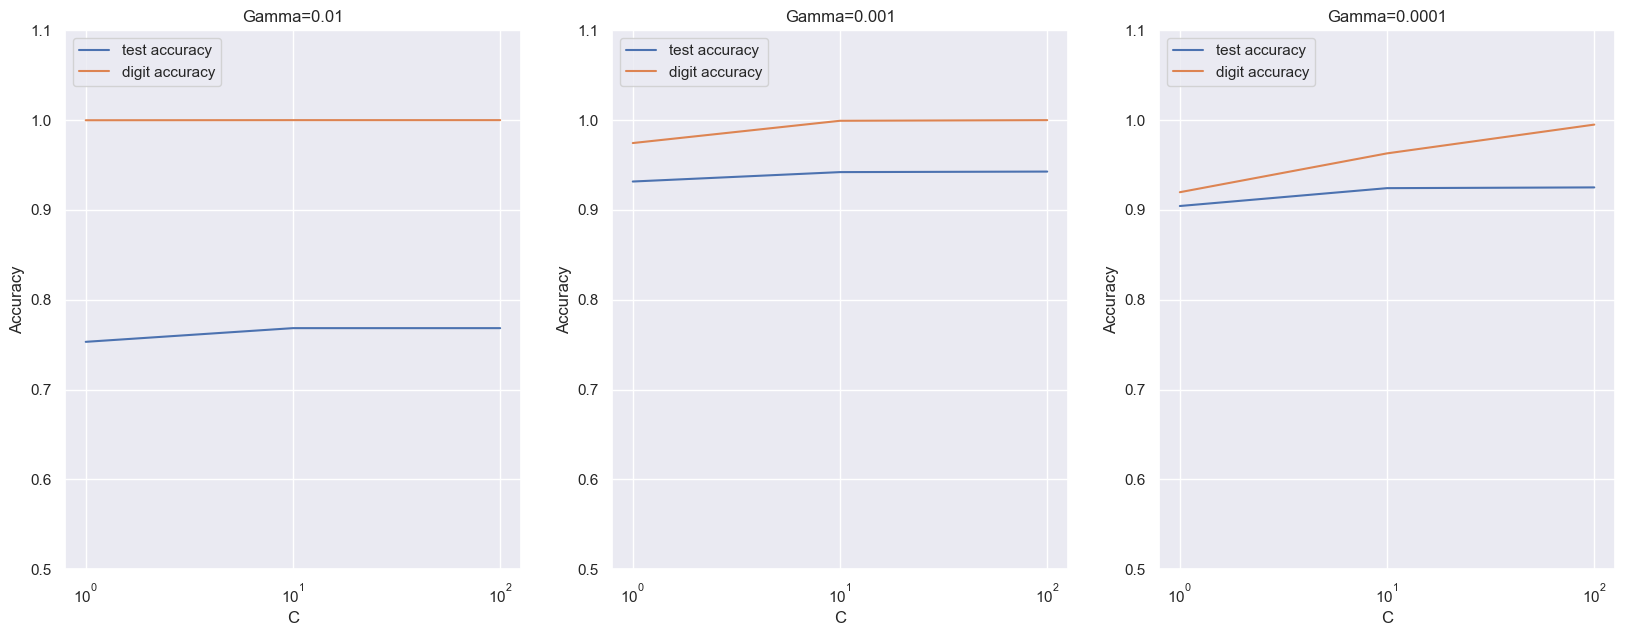

In [70]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')

In [71]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9427380952380953 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


Let us take the best value ({'C': 10, 'gamma': 0.001}) as suggested by the sklearn to build the final model.

# Building and evaluating the final model

In [72]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy:", metrics.accuracy_score(Y_test, y_pred), "\n")
print("confusion matrix:\n",metrics.confusion_matrix(Y_test, y_pred), "\n")

accuracy: 0.9456547619047619 

confusion matrix:
 [[3266    0   21    2    5   14   18    1    3    4]
 [   0 3689   29    8    4    3    8    9   12    2]
 [  17   11 3207   28   15    3   31   34   25    9]
 [   7    7   86 3232    7   57    4   26   44   23]
 [   3   14   42    2 3051    7   20   14    6  100]
 [  12    7   38   70   18 2796   49    6   22    5]
 [  24    3   40    0   11   27 3175    1    7    0]
 [   5   13   72    7   31    4    0 3271    6   63]
 [  18   22   40   45   18   43   11   11 3023   22]
 [  12   12   30   44   55    9    0   88   20 3064]] 



In [73]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3334
           1       0.98      0.98      0.98      3764
           2       0.89      0.95      0.92      3380
           3       0.94      0.93      0.93      3493
           4       0.95      0.94      0.94      3259
           5       0.94      0.92      0.93      3023
           6       0.96      0.97      0.96      3288
           7       0.95      0.94      0.94      3472
           8       0.95      0.93      0.94      3253
           9       0.93      0.92      0.92      3334

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



We see that with hyperparameter - C = 10 and gamma = 0.001, we see overall accuracy of the model is 95% and also precision for each label is above 95%.

The accuracy achieved using a non-linear kernel (0.94) is mush higher than that of a linear one (0.83). We can conclude that the problem is highly non-linear in nature.